In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [11]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [12]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [29]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

3

In [14]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49854 stdev: 0.05900
Best fitness: 0.69511 - size: (2, 13) - species 1 - id 12
Average adjusted fitness: 0.209
Mean genetic distance 2.883, standard deviation 0.478
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.806 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52381 stdev: 0.07534
Best fitness: 0.73346 - size: (3, 15) - species 9 - id 379
Average adjusted fitness: 0.245
Mean genetic distance 2.949, standard deviation 0.479
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.224 sec (7.015 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55908 stdev: 0.07787
Best fitness: 0.76933 - size: (3, 15) - species 3 - id 472
Average adjusted fitness: 0.271
Mean genetic distance 2.978, standard deviation 0.466
Population of 201 members in 27 species
Total extinction

Mean genetic distance 3.251, standard deviation 0.519
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 7.730 sec (8.390 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62425 stdev: 0.11121
Best fitness: 0.80952 - size: (7, 20) - species 16 - id 3454
Average adjusted fitness: 0.375
Mean genetic distance 3.244, standard deviation 0.513
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.951 sec (8.382 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62659 stdev: 0.10557
Best fitness: 0.80952 - size: (7, 20) - species 16 - id 3454
Average adjusted fitness: 0.260
Mean genetic distance 3.218, standard deviation 0.510
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 8.161 sec (8.405 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63735 stdev: 0.11173
Best fitness: 0.80952 - size: (7, 20) - species 16 - id 3454


Mean genetic distance 3.143, standard deviation 0.557
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 10.952 sec (9.251 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64860 stdev: 0.10326
Best fitness: 0.84230 - size: (10, 29) - species 5 - id 5963
Average adjusted fitness: 0.245
Mean genetic distance 3.141, standard deviation 0.546
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.044 sec (9.384 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63689 stdev: 0.12112
Best fitness: 0.84230 - size: (10, 29) - species 5 - id 5963
Average adjusted fitness: 0.394
Mean genetic distance 3.135, standard deviation 0.528
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.126 sec (9.485 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.63828 stdev: 0.11481
Best fitness: 0.84230 - size: (10, 29) - species 5 - id 59

Mean genetic distance 3.175, standard deviation 0.562
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 10.304 sec (10.275 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65255 stdev: 0.12493
Best fitness: 0.84230 - size: (10, 29) - species 42 - id 5963
Average adjusted fitness: 0.342
Mean genetic distance 3.162, standard deviation 0.549
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 9.878 sec (10.242 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.64954 stdev: 0.12675
Best fitness: 0.84230 - size: (10, 29) - species 42 - id 5963
Average adjusted fitness: 0.382
Mean genetic distance 3.168, standard deviation 0.545
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 9.781 sec (10.198 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.65152 stdev: 0.12141
Best fitness: 0.84230 - size: (10, 29) - species 42 - i

Mean genetic distance 3.072, standard deviation 0.561
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.281 sec (9.988 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.64557 stdev: 0.12905
Best fitness: 0.84230 - size: (11, 31) - species 16 - id 14530
Average adjusted fitness: 0.289
Mean genetic distance 3.063, standard deviation 0.546
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.155 sec (10.034 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.66248 stdev: 0.12345
Best fitness: 0.84230 - size: (11, 31) - species 16 - id 14530
Average adjusted fitness: 0.207
Mean genetic distance 3.053, standard deviation 0.557
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.367 sec (10.137 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.66406 stdev: 0.12812
Best fitness: 0.84230 - size: (11, 31) - species 16 

Population's average fitness: 0.69094 stdev: 0.12800
Best fitness: 0.84663 - size: (10, 29) - species 42 - id 17074
Average adjusted fitness: 0.394
Mean genetic distance 3.118, standard deviation 0.582
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.698 sec (10.945 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.66033 stdev: 0.13065
Best fitness: 0.84663 - size: (10, 29) - species 42 - id 17074
Average adjusted fitness: 0.325
Mean genetic distance 3.094, standard deviation 0.588
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 10.940 sec (10.958 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.66753 stdev: 0.12735
Best fitness: 0.84663 - size: (10, 29) - species 42 - id 17074
Average adjusted fitness: 0.330
Mean genetic distance 3.073, standard deviation 0.609
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 10.315 sec (10.745 ave

Population's average fitness: 0.68033 stdev: 0.12945
Best fitness: 0.85776 - size: (14, 39) - species 16 - id 20764
Average adjusted fitness: 0.335
Mean genetic distance 2.908, standard deviation 0.502
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 13.511 sec (11.682 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.66913 stdev: 0.13203
Best fitness: 0.85776 - size: (14, 39) - species 16 - id 20764
Average adjusted fitness: 0.461
Mean genetic distance 2.901, standard deviation 0.519
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 14.426 sec (12.042 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.67740 stdev: 0.13452
Best fitness: 0.85776 - size: (14, 39) - species 16 - id 20764
Average adjusted fitness: 0.444
Mean genetic distance 2.901, standard deviation 0.487
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.176 sec (12.365 ave

Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.250 sec (6.929 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63187 stdev: 0.10986
Best fitness: 0.80458 - size: (4, 16) - species 17 - id 1141
Average adjusted fitness: 0.324
Mean genetic distance 3.173, standard deviation 0.527
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.525 sec (7.015 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63504 stdev: 0.10981
Best fitness: 0.80458 - size: (4, 16) - species 17 - id 1141
Average adjusted fitness: 0.293
Mean genetic distance 3.159, standard deviation 0.530
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 7.372 sec (7.078 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63368 stdev: 0.11677
Best fitness: 0.80458 - size: (4, 16) - species 17 - id 1141
Average adjusted fitness: 0.314
Mean genetic distance 

Population of 207 members in 21 species
Total extinctions: 0
Generation time: 7.998 sec (9.081 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.64481 stdev: 0.11488
Best fitness: 0.80458 - size: (4, 16) - species 17 - id 1141
Average adjusted fitness: 0.279
Mean genetic distance 3.249, standard deviation 0.564
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 8.407 sec (9.015 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65559 stdev: 0.10888
Best fitness: 0.80458 - size: (4, 16) - species 17 - id 1141
Average adjusted fitness: 0.250
Mean genetic distance 3.271, standard deviation 0.570
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 7.973 sec (8.399 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.65203 stdev: 0.11358
Best fitness: 0.80458 - size: (4, 16) - species 17 - id 1141
Average adjusted fitness: 0.358
Mean genetic distance 

Mean genetic distance 3.215, standard deviation 0.624
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 16.746 sec (10.408 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.65492 stdev: 0.11876
Best fitness: 0.81323 - size: (11, 34) - species 26 - id 9511
Average adjusted fitness: 0.269
Mean genetic distance 3.231, standard deviation 0.625
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 9.993 sec (10.261 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.65072 stdev: 0.12212
Best fitness: 0.81323 - size: (11, 35) - species 47 - id 10656
Average adjusted fitness: 0.330
Mean genetic distance 3.254, standard deviation 0.606
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 9.769 sec (10.327 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.64871 stdev: 0.11930
Best fitness: 0.81323 - size: (11, 35) - species 47 - 

Population's average fitness: 0.63695 stdev: 0.12627
Best fitness: 0.81323 - size: (11, 35) - species 53 - id 10656
Average adjusted fitness: 0.258
Mean genetic distance 3.144, standard deviation 0.577
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 10.475 sec (10.458 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.64679 stdev: 0.12721
Best fitness: 0.81323 - size: (11, 35) - species 53 - id 10656
Average adjusted fitness: 0.357
Mean genetic distance 3.159, standard deviation 0.564
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 10.983 sec (10.511 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.63862 stdev: 0.12954
Best fitness: 0.81323 - size: (11, 35) - species 53 - id 10656
Average adjusted fitness: 0.256
Mean genetic distance 3.171, standard deviation 0.568
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.771 sec (10.550 avera

Population's average fitness: 0.63685 stdev: 0.13085
Best fitness: 0.81942 - size: (12, 36) - species 26 - id 16108
Average adjusted fitness: 0.266
Mean genetic distance 2.970, standard deviation 0.637
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 11.476 sec (11.753 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.63994 stdev: 0.12157
Best fitness: 0.81942 - size: (12, 36) - species 26 - id 16108
Average adjusted fitness: 0.234
Mean genetic distance 2.964, standard deviation 0.634
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 12.028 sec (11.708 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.63087 stdev: 0.12185
Best fitness: 0.81942 - size: (12, 36) - species 26 - id 16108
Average adjusted fitness: 0.226
Mean genetic distance 2.975, standard deviation 0.614
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 11.487 sec (11.534 averag

Population's average fitness: 0.67411 stdev: 0.11936
Best fitness: 0.81942 - size: (12, 36) - species 26 - id 16108
Average adjusted fitness: 0.265
Mean genetic distance 3.071, standard deviation 0.580
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 10.553 sec (11.254 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.66363 stdev: 0.11887
Best fitness: 0.81942 - size: (12, 36) - species 26 - id 16108
Average adjusted fitness: 0.266
Mean genetic distance 3.089, standard deviation 0.582
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.376 sec (11.340 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.64948 stdev: 0.12822
Best fitness: 0.81942 - size: (12, 36) - species 26 - id 16108
Average adjusted fitness: 0.242
Mean genetic distance 3.090, standard deviation 0.575
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 10.950 sec (11.234 ave

Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.450 sec (6.250 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59623 stdev: 0.08812
Best fitness: 0.76314 - size: (6, 19) - species 29 - id 1736
Average adjusted fitness: 0.150
Mean genetic distance 3.155, standard deviation 0.485
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.505 sec (6.324 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60343 stdev: 0.08201
Best fitness: 0.76314 - size: (6, 19) - species 29 - id 1736
Average adjusted fitness: 0.145
Mean genetic distance 3.170, standard deviation 0.486
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.620 sec (6.382 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61021 stdev: 0.09009
Best fitness: 0.76685 - size: (5, 19) - species 19 - id 2100
Average adjusted fitness: 0.203
Mean genetic distance 


 ****** Running generation 36 ****** 

Population's average fitness: 0.60942 stdev: 0.09492
Best fitness: 0.76685 - size: (5, 19) - species 19 - id 2100
Average adjusted fitness: 0.335
Mean genetic distance 3.239, standard deviation 0.525
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 7.634 sec (7.619 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.60675 stdev: 0.09317
Best fitness: 0.76685 - size: (5, 19) - species 19 - id 2100
Average adjusted fitness: 0.207
Mean genetic distance 3.243, standard deviation 0.531
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 7.857 sec (7.691 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61204 stdev: 0.09386
Best fitness: 0.76685 - size: (5, 19) - species 19 - id 2100
Average adjusted fitness: 0.284
Mean genetic distance 3.231, standard deviation 0.521
Population of 199 members in 19 species
Total extinctions: 0
Generation 

Population's average fitness: 0.62445 stdev: 0.09447
Best fitness: 0.78046 - size: (9, 26) - species 33 - id 8161
Average adjusted fitness: 0.175
Mean genetic distance 3.360, standard deviation 0.569
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.447 sec (9.118 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62236 stdev: 0.09500
Best fitness: 0.78046 - size: (9, 26) - species 33 - id 8161
Average adjusted fitness: 0.171
Mean genetic distance 3.370, standard deviation 0.557
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 9.152 sec (9.163 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61996 stdev: 0.09796
Best fitness: 0.78046 - size: (9, 26) - species 33 - id 8161
Average adjusted fitness: 0.198
Mean genetic distance 3.329, standard deviation 0.572
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 9.454 sec (9.227 average)

 ******

Mean genetic distance 3.187, standard deviation 0.659
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 9.892 sec (9.789 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.62914 stdev: 0.09500
Best fitness: 0.78850 - size: (9, 26) - species 33 - id 11518
Average adjusted fitness: 0.210
Mean genetic distance 3.195, standard deviation 0.652
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 10.073 sec (9.751 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.61703 stdev: 0.09606
Best fitness: 0.78850 - size: (9, 26) - species 33 - id 11518
Average adjusted fitness: 0.247
Mean genetic distance 3.216, standard deviation 0.619
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 9.977 sec (9.778 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.62830 stdev: 0.09699
Best fitness: 0.78850 - size: (9, 26) - species 33 - id 11

Mean genetic distance 3.166, standard deviation 0.590
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 11.105 sec (11.860 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.63296 stdev: 0.09789
Best fitness: 0.79777 - size: (13, 33) - species 62 - id 16514
Average adjusted fitness: 0.222
Mean genetic distance 3.180, standard deviation 0.597
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 11.403 sec (11.965 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.62422 stdev: 0.10322
Best fitness: 0.79777 - size: (13, 33) - species 62 - id 16514
Average adjusted fitness: 0.324
Mean genetic distance 3.163, standard deviation 0.591
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 11.353 sec (11.718 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.62217 stdev: 0.10162
Best fitness: 0.79777 - size: (13, 33) - species

Population's average fitness: 0.63165 stdev: 0.09937
Best fitness: 0.80334 - size: (14, 34) - species 62 - id 20098
Average adjusted fitness: 0.172
Mean genetic distance 3.064, standard deviation 0.591
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 11.626 sec (11.381 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.63616 stdev: 0.10263
Best fitness: 0.80334 - size: (14, 34) - species 62 - id 20098
Average adjusted fitness: 0.353
Mean genetic distance 2.980, standard deviation 0.567
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 11.536 sec (11.388 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.62685 stdev: 0.10215
Best fitness: 0.80334 - size: (14, 34) - species 62 - id 20098
Average adjusted fitness: 0.261
Mean genetic distance 2.986, standard deviation 0.569
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 11.529 sec (11.409 ave

Population's average fitness: 0.58224 stdev: 0.09279
Best fitness: 0.72542 - size: (4, 16) - species 23 - id 651
Average adjusted fitness: 0.260
Mean genetic distance 3.121, standard deviation 0.501
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 6.269 sec (5.851 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59234 stdev: 0.09085
Best fitness: 0.72542 - size: (4, 16) - species 23 - id 651
Average adjusted fitness: 0.272
Mean genetic distance 3.114, standard deviation 0.482
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.491 sec (5.931 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59129 stdev: 0.09294
Best fitness: 0.72542 - size: (4, 16) - species 23 - id 651
Average adjusted fitness: 0.246
Mean genetic distance 3.166, standard deviation 0.495
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.975 sec (6.047 average)

 ****** Runn

Mean genetic distance 3.210, standard deviation 0.537
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.651 sec (7.335 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61154 stdev: 0.09166
Best fitness: 0.74830 - size: (6, 22) - species 27 - id 2412
Average adjusted fitness: 0.230
Mean genetic distance 3.215, standard deviation 0.533
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 7.883 sec (7.402 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.60938 stdev: 0.10103
Best fitness: 0.74830 - size: (6, 22) - species 27 - id 2412
Average adjusted fitness: 0.268
Mean genetic distance 3.199, standard deviation 0.542
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 7.867 sec (7.474 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.60852 stdev: 0.09883
Best fitness: 0.74830 - size: (6, 22) - species 27 - id 2412


Mean genetic distance 3.318, standard deviation 0.555
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 9.450 sec (9.283 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62162 stdev: 0.09670
Best fitness: 0.76190 - size: (10, 33) - species 12 - id 5714
Average adjusted fitness: 0.211
Mean genetic distance 3.312, standard deviation 0.555
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 9.491 sec (9.383 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.61344 stdev: 0.10667
Best fitness: 0.76190 - size: (10, 33) - species 12 - id 5714
Average adjusted fitness: 0.211
Mean genetic distance 3.296, standard deviation 0.568
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 9.729 sec (9.511 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.61268 stdev: 0.10432
Best fitness: 0.76190 - size: (10, 33) - species 12 - id 57

Mean genetic distance 3.245, standard deviation 0.605
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 13.100 sec (10.304 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.60198 stdev: 0.11401
Best fitness: 0.76562 - size: (15, 35) - species 55 - id 11837
Average adjusted fitness: 0.268
Mean genetic distance 3.246, standard deviation 0.600
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 10.157 sec (10.333 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.61273 stdev: 0.10816
Best fitness: 0.76562 - size: (15, 35) - species 55 - id 11837
Average adjusted fitness: 0.300
Mean genetic distance 3.220, standard deviation 0.631
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 9.943 sec (10.342 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.60277 stdev: 0.11656
Best fitness: 0.76562 - size: (15, 35) - species 55 

Population's average fitness: 0.63268 stdev: 0.10164
Best fitness: 0.77860 - size: (16, 37) - species 55 - id 13754
Average adjusted fitness: 0.264
Mean genetic distance 3.200, standard deviation 0.575
Population of 207 members in 16 species
Total extinctions: 0
Generation time: 10.044 sec (10.017 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.63147 stdev: 0.10644
Best fitness: 0.77860 - size: (16, 37) - species 55 - id 13754
Average adjusted fitness: 0.280
Mean genetic distance 3.211, standard deviation 0.575
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 10.556 sec (10.054 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.61498 stdev: 0.11462
Best fitness: 0.77860 - size: (16, 37) - species 55 - id 13754
Average adjusted fitness: 0.274
Mean genetic distance 3.227, standard deviation 0.576
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 10.555 sec (10.107 ave

Population's average fitness: 0.61988 stdev: 0.11222
Best fitness: 0.78602 - size: (16, 37) - species 55 - id 19120
Average adjusted fitness: 0.252
Mean genetic distance 3.173, standard deviation 0.610
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 11.030 sec (10.870 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.62521 stdev: 0.10608
Best fitness: 0.78602 - size: (16, 37) - species 55 - id 19120
Average adjusted fitness: 0.240
Mean genetic distance 3.165, standard deviation 0.596
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 10.679 sec (10.831 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.61918 stdev: 0.10556
Best fitness: 0.78602 - size: (16, 37) - species 55 - id 19120
Average adjusted fitness: 0.254
Mean genetic distance 3.168, standard deviation 0.588
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.640 sec (10.816 ave

Population's average fitness: 0.52554 stdev: 0.08380
Best fitness: 0.67842 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.212
Mean genetic distance 2.931, standard deviation 0.512
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.267 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56393 stdev: 0.07662
Best fitness: 0.68336 - size: (3, 14) - species 4 - id 220
Average adjusted fitness: 0.265
Mean genetic distance 3.017, standard deviation 0.525
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.629 sec (5.448 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57151 stdev: 0.08005
Best fitness: 0.71738 - size: (4, 17) - species 4 - id 541
Average adjusted fitness: 0.200
Mean genetic distance 3.007, standard deviation 0.507
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.893 sec (5.596 average)

 ****** Running generation 3 ***

Population's average fitness: 0.64277 stdev: 0.08255
Best fitness: 0.79406 - size: (6, 21) - species 9 - id 3389
Average adjusted fitness: 0.265
Mean genetic distance 3.298, standard deviation 0.506
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.891 sec (7.279 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63818 stdev: 0.08798
Best fitness: 0.79406 - size: (6, 21) - species 9 - id 3389
Average adjusted fitness: 0.282
Mean genetic distance 3.293, standard deviation 0.499
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.260 sec (7.303 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64990 stdev: 0.08893
Best fitness: 0.79406 - size: (6, 21) - species 9 - id 3389
Average adjusted fitness: 0.275
Mean genetic distance 3.290, standard deviation 0.493
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.523 sec (7.381 average)

 ****** Ru

Population of 198 members in 21 species
Total extinctions: 0
Generation time: 8.340 sec (8.220 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65191 stdev: 0.08895
Best fitness: 0.79406 - size: (6, 21) - species 9 - id 3389
Average adjusted fitness: 0.267
Mean genetic distance 3.205, standard deviation 0.554
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 8.599 sec (8.267 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65731 stdev: 0.08340
Best fitness: 0.79406 - size: (6, 21) - species 9 - id 3389
Average adjusted fitness: 0.291
Mean genetic distance 3.191, standard deviation 0.562
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 8.463 sec (8.298 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.64502 stdev: 0.08436
Best fitness: 0.79406 - size: (6, 21) - species 9 - id 3389
Average adjusted fitness: 0.275
Mean genetic distance 3.1

Population's average fitness: 0.64989 stdev: 0.09361
Best fitness: 0.79963 - size: (12, 33) - species 51 - id 10554
Average adjusted fitness: 0.340
Mean genetic distance 3.275, standard deviation 0.596
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 9.772 sec (9.335 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.64708 stdev: 0.09385
Best fitness: 0.79963 - size: (12, 33) - species 51 - id 10554
Average adjusted fitness: 0.251
Mean genetic distance 3.292, standard deviation 0.591
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 9.786 sec (9.404 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.66209 stdev: 0.08477
Best fitness: 0.79963 - size: (12, 33) - species 51 - id 10554
Average adjusted fitness: 0.268
Mean genetic distance 3.259, standard deviation 0.615
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.675 sec (9.452 average)

 

Population's average fitness: 0.66682 stdev: 0.09443
Best fitness: 0.81014 - size: (12, 34) - species 51 - id 14927
Average adjusted fitness: 0.333
Mean genetic distance 3.281, standard deviation 0.570
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.203 sec (10.418 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.66626 stdev: 0.09114
Best fitness: 0.81014 - size: (12, 34) - species 51 - id 14927
Average adjusted fitness: 0.320
Mean genetic distance 3.249, standard deviation 0.580
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 10.436 sec (10.452 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.66860 stdev: 0.09562
Best fitness: 0.81014 - size: (12, 34) - species 51 - id 14927
Average adjusted fitness: 0.328
Mean genetic distance 3.256, standard deviation 0.574
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 10.325 sec (10.480 avera

Population's average fitness: 0.65987 stdev: 0.08885
Best fitness: 0.81509 - size: (15, 38) - species 51 - id 17561
Average adjusted fitness: 0.326
Mean genetic distance 3.181, standard deviation 0.600
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 11.492 sec (11.100 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.66515 stdev: 0.08923
Best fitness: 0.81509 - size: (15, 38) - species 51 - id 17561
Average adjusted fitness: 0.325
Mean genetic distance 3.157, standard deviation 0.618
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 11.402 sec (11.187 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.65763 stdev: 0.09504
Best fitness: 0.81756 - size: (17, 42) - species 51 - id 19326
Average adjusted fitness: 0.262
Mean genetic distance 3.163, standard deviation 0.632
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 11.430 sec (11.244 ave

Population's average fitness: 0.65497 stdev: 0.09693
Best fitness: 0.82127 - size: (19, 46) - species 81 - id 21766
Average adjusted fitness: 0.257
Mean genetic distance 3.193, standard deviation 0.598
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 12.292 sec (12.603 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.66277 stdev: 0.09102
Best fitness: 0.82127 - size: (19, 46) - species 81 - id 21766
Average adjusted fitness: 0.331
Mean genetic distance 3.150, standard deviation 0.639
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.229 sec (12.607 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.66913 stdev: 0.08878
Best fitness: 0.82127 - size: (19, 46) - species 81 - id 21766
Average adjusted fitness: 0.277
Mean genetic distance 3.160, standard deviation 0.651
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 11.952 sec (12.573 ave

Generation time: 6.920 sec (6.817 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66386 stdev: 0.12644
Best fitness: 0.80643 - size: (5, 19) - species 25 - id 1279
Average adjusted fitness: 0.370
Mean genetic distance 3.094, standard deviation 0.503
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 6.951 sec (6.860 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65322 stdev: 0.13465
Best fitness: 0.80643 - size: (5, 19) - species 25 - id 1279
Average adjusted fitness: 0.371
Mean genetic distance 3.116, standard deviation 0.533
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 6.857 sec (6.892 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65047 stdev: 0.14314
Best fitness: 0.80643 - size: (5, 19) - species 25 - id 1279
Average adjusted fitness: 0.392
Mean genetic distance 3.134, standard deviation 0.541
Population of 193 members in 

Population's average fitness: 0.66480 stdev: 0.12384
Best fitness: 0.80643 - size: (5, 19) - species 25 - id 1279
Average adjusted fitness: 0.356
Mean genetic distance 3.226, standard deviation 0.545
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 8.372 sec (7.978 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65724 stdev: 0.13570
Best fitness: 0.80643 - size: (5, 19) - species 25 - id 1279
Average adjusted fitness: 0.352
Mean genetic distance 3.229, standard deviation 0.545
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 8.617 sec (8.055 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.65480 stdev: 0.13775
Best fitness: 0.80952 - size: (8, 28) - species 48 - id 6825
Average adjusted fitness: 0.356
Mean genetic distance 3.258, standard deviation 0.535
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 8.335 sec (8.112 average)

 ******

Population's average fitness: 0.66798 stdev: 0.13309
Best fitness: 0.83179 - size: (7, 25) - species 53 - id 10251
Average adjusted fitness: 0.376
Mean genetic distance 3.301, standard deviation 0.581
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 9.923 sec (9.577 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.66453 stdev: 0.13650
Best fitness: 0.83179 - size: (7, 25) - species 53 - id 10251
Average adjusted fitness: 0.369
Mean genetic distance 3.307, standard deviation 0.566
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 10.888 sec (9.751 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.65199 stdev: 0.13842
Best fitness: 0.83179 - size: (7, 25) - species 53 - id 10251
Average adjusted fitness: 0.365
Mean genetic distance 3.323, standard deviation 0.568
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 9.827 sec (9.797 average)

 **

Population's average fitness: 0.68310 stdev: 0.12168
Best fitness: 0.83426 - size: (7, 26) - species 53 - id 13252
Average adjusted fitness: 0.380
Mean genetic distance 3.258, standard deviation 0.570
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 10.330 sec (10.270 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.67399 stdev: 0.13920
Best fitness: 0.83426 - size: (7, 26) - species 53 - id 13252
Average adjusted fitness: 0.367
Mean genetic distance 3.236, standard deviation 0.581
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 10.295 sec (10.281 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.67707 stdev: 0.12791
Best fitness: 0.83426 - size: (7, 26) - species 53 - id 13252
Average adjusted fitness: 0.380
Mean genetic distance 3.202, standard deviation 0.609
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 10.681 sec (10.306 average)

Population's average fitness: 0.66926 stdev: 0.14737
Best fitness: 0.83673 - size: (14, 33) - species 62 - id 18081
Average adjusted fitness: 0.349
Mean genetic distance 3.135, standard deviation 0.630
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 10.548 sec (10.789 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.66987 stdev: 0.14334
Best fitness: 0.83673 - size: (14, 33) - species 62 - id 18081
Average adjusted fitness: 0.456
Mean genetic distance 3.152, standard deviation 0.621
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 10.570 sec (10.755 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.68402 stdev: 0.12364
Best fitness: 0.83673 - size: (14, 33) - species 62 - id 18081
Average adjusted fitness: 0.393
Mean genetic distance 3.158, standard deviation 0.624
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 10.517 sec (10.753 ave

Population's average fitness: 0.64855 stdev: 0.14031
Best fitness: 0.83673 - size: (14, 33) - species 62 - id 18081
Average adjusted fitness: 0.375
Mean genetic distance 2.991, standard deviation 0.499
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 10.508 sec (10.732 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.66128 stdev: 0.13315
Best fitness: 0.83673 - size: (14, 33) - species 62 - id 18081
Average adjusted fitness: 0.342
Mean genetic distance 2.999, standard deviation 0.519
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 10.596 sec (10.677 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.65354 stdev: 0.13856
Best fitness: 0.83673 - size: (14, 33) - species 62 - id 18081
Average adjusted fitness: 0.361
Mean genetic distance 3.033, standard deviation 0.529
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 11.026 sec (10.671 ave

Population of 193 members in 40 species
Total extinctions: 0
Generation time: 6.870 sec (6.525 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61963 stdev: 0.09058
Best fitness: 0.76438 - size: (3, 16) - species 11 - id 1279
Average adjusted fitness: 0.281
Mean genetic distance 3.196, standard deviation 0.492
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.543 sec (6.567 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62925 stdev: 0.08087
Best fitness: 0.76438 - size: (3, 16) - species 11 - id 1279
Average adjusted fitness: 0.240
Mean genetic distance 3.201, standard deviation 0.483
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.933 sec (6.626 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62714 stdev: 0.08739
Best fitness: 0.76438 - size: (3, 16) - species 11 - id 1279
Average adjusted fitness: 0.230
Mean genetic distance 

Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.924 sec (7.732 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63471 stdev: 0.10189
Best fitness: 0.76871 - size: (7, 26) - species 37 - id 4018
Average adjusted fitness: 0.239
Mean genetic distance 3.240, standard deviation 0.519
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.889 sec (7.756 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64138 stdev: 0.09443
Best fitness: 0.77180 - size: (4, 19) - species 11 - id 5284
Average adjusted fitness: 0.375
Mean genetic distance 3.226, standard deviation 0.534
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 8.027 sec (7.805 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.64106 stdev: 0.09215
Best fitness: 0.77180 - size: (4, 19) - species 11 - id 5284
Average adjusted fitness: 0.254
Mean genetic distance 

Mean genetic distance 3.273, standard deviation 0.583
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 8.512 sec (8.590 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.65748 stdev: 0.08606
Best fitness: 0.78541 - size: (5, 21) - species 11 - id 7148
Average adjusted fitness: 0.254
Mean genetic distance 3.275, standard deviation 0.571
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 8.618 sec (8.591 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66214 stdev: 0.09084
Best fitness: 0.78541 - size: (5, 21) - species 11 - id 7148
Average adjusted fitness: 0.381
Mean genetic distance 3.258, standard deviation 0.577
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 8.567 sec (8.612 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.64555 stdev: 0.09522
Best fitness: 0.78541 - size: (5, 21) - species 11 - id 7148


Mean genetic distance 3.075, standard deviation 0.576
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 9.859 sec (9.193 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.64844 stdev: 0.08313
Best fitness: 0.79406 - size: (6, 22) - species 11 - id 11180
Average adjusted fitness: 0.256
Mean genetic distance 3.105, standard deviation 0.562
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.740 sec (9.275 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.64796 stdev: 0.08810
Best fitness: 0.79406 - size: (6, 22) - species 11 - id 11180
Average adjusted fitness: 0.283
Mean genetic distance 3.142, standard deviation 0.577
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 9.785 sec (9.380 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.65043 stdev: 0.08773
Best fitness: 0.79406 - size: (6, 22) - species 11 - id 111

Mean genetic distance 3.132, standard deviation 0.542
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.391 sec (10.358 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.64448 stdev: 0.09652
Best fitness: 0.79530 - size: (6, 22) - species 11 - id 14617
Average adjusted fitness: 0.251
Mean genetic distance 3.129, standard deviation 0.563
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 11.117 sec (10.437 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.64511 stdev: 0.09538
Best fitness: 0.79530 - size: (6, 22) - species 11 - id 14617
Average adjusted fitness: 0.255
Mean genetic distance 3.113, standard deviation 0.571
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.504 sec (10.456 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.64947 stdev: 0.09797
Best fitness: 0.79530 - size: (6, 22) - species 11

Population's average fitness: 0.63207 stdev: 0.09931
Best fitness: 0.79530 - size: (6, 22) - species 11 - id 14617
Average adjusted fitness: 0.309
Mean genetic distance 2.926, standard deviation 0.536
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 10.565 sec (10.627 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.64327 stdev: 0.08319
Best fitness: 0.79530 - size: (6, 22) - species 11 - id 14617
Average adjusted fitness: 0.283
Mean genetic distance 2.928, standard deviation 0.528
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 10.487 sec (10.591 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.63863 stdev: 0.09780
Best fitness: 0.79530 - size: (6, 22) - species 11 - id 14617
Average adjusted fitness: 0.307
Mean genetic distance 2.916, standard deviation 0.490
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.665 sec (10.565 averag

Population's average fitness: 0.59043 stdev: 0.10513
Best fitness: 0.77304 - size: (5, 16) - species 5 - id 857
Average adjusted fitness: 0.231
Mean genetic distance 3.139, standard deviation 0.489
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.943 sec (7.173 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59376 stdev: 0.10403
Best fitness: 0.77304 - size: (5, 16) - species 5 - id 857
Average adjusted fitness: 0.230
Mean genetic distance 3.155, standard deviation 0.498
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 8.824 sec (7.380 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60404 stdev: 0.10144
Best fitness: 0.77304 - size: (5, 16) - species 5 - id 857
Average adjusted fitness: 0.212
Mean genetic distance 3.133, standard deviation 0.501
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 9.261 sec (7.589 average)

 ****** Running

Population's average fitness: 0.64968 stdev: 0.10623
Best fitness: 0.80581 - size: (8, 25) - species 18 - id 2968
Average adjusted fitness: 0.284
Mean genetic distance 3.277, standard deviation 0.498
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 12.796 sec (9.433 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64134 stdev: 0.11481
Best fitness: 0.80581 - size: (8, 25) - species 18 - id 2968
Average adjusted fitness: 0.241
Mean genetic distance 3.294, standard deviation 0.495
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 10.863 sec (9.634 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63633 stdev: 0.11126
Best fitness: 0.80581 - size: (8, 25) - species 18 - id 2968
Average adjusted fitness: 0.306
Mean genetic distance 3.292, standard deviation 0.503
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 9.862 sec (9.802 average)

 ****

Population's average fitness: 0.63985 stdev: 0.12412
Best fitness: 0.80581 - size: (6, 22) - species 1 - id 5799
Average adjusted fitness: 0.332
Mean genetic distance 3.205, standard deviation 0.577
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 9.175 sec (8.789 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.66155 stdev: 0.10678
Best fitness: 0.80581 - size: (6, 22) - species 1 - id 5799
Average adjusted fitness: 0.318
Mean genetic distance 3.186, standard deviation 0.573
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 8.717 sec (8.803 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63916 stdev: 0.11901
Best fitness: 0.80581 - size: (6, 22) - species 1 - id 5799
Average adjusted fitness: 0.308
Mean genetic distance 3.196, standard deviation 0.574
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 9.066 sec (8.830 average)

 ****** Ru

Total extinctions: 0
Generation time: 8.526 sec (8.601 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.63911 stdev: 0.12655
Best fitness: 0.81447 - size: (7, 23) - species 1 - id 11773
Average adjusted fitness: 0.305
Mean genetic distance 3.049, standard deviation 0.599
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 8.281 sec (8.542 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.63085 stdev: 0.12723
Best fitness: 0.81447 - size: (7, 23) - species 1 - id 11773
Average adjusted fitness: 0.359
Mean genetic distance 3.019, standard deviation 0.594
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 8.588 sec (8.519 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.63020 stdev: 0.13046
Best fitness: 0.81447 - size: (7, 23) - species 1 - id 11773
Average adjusted fitness: 0.375
Mean genetic distance 3.004, standard deviation 0.612
Populati

Population's average fitness: 0.64577 stdev: 0.13004
Best fitness: 0.81447 - size: (7, 23) - species 1 - id 11773
Average adjusted fitness: 0.380
Mean genetic distance 2.980, standard deviation 0.522
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 8.316 sec (9.079 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.64917 stdev: 0.13086
Best fitness: 0.81447 - size: (7, 23) - species 1 - id 11773
Average adjusted fitness: 0.359
Mean genetic distance 2.991, standard deviation 0.530
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 9.311 sec (9.125 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.66002 stdev: 0.11238
Best fitness: 0.81447 - size: (7, 23) - species 1 - id 11773
Average adjusted fitness: 0.348
Mean genetic distance 2.946, standard deviation 0.554
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 11.796 sec (9.370 average)

 ***

Population's average fitness: 0.66915 stdev: 0.11744
Best fitness: 0.81571 - size: (8, 25) - species 1 - id 17241
Average adjusted fitness: 0.415
Mean genetic distance 3.050, standard deviation 0.528
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 9.664 sec (10.818 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.67613 stdev: 0.10696
Best fitness: 0.81571 - size: (8, 25) - species 1 - id 17241
Average adjusted fitness: 0.290
Mean genetic distance 3.013, standard deviation 0.530
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 9.794 sec (10.612 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.66551 stdev: 0.11310
Best fitness: 0.81571 - size: (8, 25) - species 1 - id 17241
Average adjusted fitness: 0.319
Mean genetic distance 3.014, standard deviation 0.526
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 10.075 sec (10.331 average)

 

Population's average fitness: 0.52731 stdev: 0.06786
Best fitness: 0.72418 - size: (2, 13) - species 3 - id 14
Average adjusted fitness: 0.211
Mean genetic distance 3.143, standard deviation 0.538
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.766 sec (7.090 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53767 stdev: 0.07895
Best fitness: 0.74088 - size: (4, 17) - species 5 - id 499
Average adjusted fitness: 0.221
Mean genetic distance 3.107, standard deviation 0.488
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 8.080 sec (7.420 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56100 stdev: 0.08217
Best fitness: 0.74088 - size: (4, 17) - species 5 - id 499
Average adjusted fitness: 0.278
Mean genetic distance 3.123, standard deviation 0.495
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 10.685 sec (8.236 average)

 ****** Running

Population's average fitness: 0.64662 stdev: 0.09978
Best fitness: 0.82746 - size: (6, 19) - species 25 - id 2738
Average adjusted fitness: 0.243
Mean genetic distance 3.288, standard deviation 0.500
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 8.365 sec (8.123 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65161 stdev: 0.09223
Best fitness: 0.82746 - size: (6, 19) - species 25 - id 2738
Average adjusted fitness: 0.172
Mean genetic distance 3.264, standard deviation 0.499
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.081 sec (8.166 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64794 stdev: 0.09716
Best fitness: 0.82746 - size: (6, 19) - species 25 - id 2738
Average adjusted fitness: 0.291
Mean genetic distance 3.253, standard deviation 0.497
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 8.164 sec (8.096 average)

 ******

Population's average fitness: 0.65967 stdev: 0.11029
Best fitness: 0.82808 - size: (7, 22) - species 25 - id 3643
Average adjusted fitness: 0.279
Mean genetic distance 3.253, standard deviation 0.567
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.393 sec (9.783 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65088 stdev: 0.10950
Best fitness: 0.82808 - size: (7, 22) - species 25 - id 3643
Average adjusted fitness: 0.196
Mean genetic distance 3.274, standard deviation 0.550
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.444 sec (9.821 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.66602 stdev: 0.10953
Best fitness: 0.82808 - size: (7, 22) - species 25 - id 3643
Average adjusted fitness: 0.276
Mean genetic distance 3.261, standard deviation 0.567
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 9.425 sec (9.868 average)

 ******

Mean genetic distance 3.216, standard deviation 0.588
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 9.320 sec (10.550 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66024 stdev: 0.10815
Best fitness: 0.83735 - size: (6, 20) - species 25 - id 11061
Average adjusted fitness: 0.282
Mean genetic distance 3.189, standard deviation 0.578
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 9.702 sec (10.552 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.65056 stdev: 0.10977
Best fitness: 0.83735 - size: (6, 20) - species 25 - id 11061
Average adjusted fitness: 0.328
Mean genetic distance 3.210, standard deviation 0.585
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 9.630 sec (10.510 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.65348 stdev: 0.10941
Best fitness: 0.83735 - size: (6, 20) - species 25 - id 

Mean genetic distance 3.168, standard deviation 0.598
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 10.336 sec (10.231 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.66920 stdev: 0.10735
Best fitness: 0.84045 - size: (18, 42) - species 65 - id 14779
Average adjusted fitness: 0.272
Mean genetic distance 3.149, standard deviation 0.579
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 10.533 sec (10.313 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.65901 stdev: 0.11050
Best fitness: 0.84045 - size: (18, 42) - species 65 - id 14779
Average adjusted fitness: 0.274
Mean genetic distance 3.133, standard deviation 0.574
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 10.205 sec (10.370 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.65150 stdev: 0.10746
Best fitness: 0.84045 - size: (18, 42) - species 7

Population's average fitness: 0.69254 stdev: 0.11364
Best fitness: 0.84230 - size: (7, 22) - species 25 - id 17293
Average adjusted fitness: 0.227
Mean genetic distance 2.915, standard deviation 0.498
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.976 sec (11.514 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.70411 stdev: 0.11090
Best fitness: 0.84230 - size: (7, 22) - species 25 - id 17293
Average adjusted fitness: 0.263
Mean genetic distance 2.915, standard deviation 0.496
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 11.804 sec (11.541 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.70555 stdev: 0.10894
Best fitness: 0.84230 - size: (7, 22) - species 25 - id 17293
Average adjusted fitness: 0.375
Mean genetic distance 2.914, standard deviation 0.512
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 11.611 sec (11.591 averag

Population's average fitness: 0.72393 stdev: 0.11034
Best fitness: 0.84416 - size: (25, 56) - species 89 - id 22140
Average adjusted fitness: 0.389
Mean genetic distance 2.983, standard deviation 0.566
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 12.561 sec (12.911 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.72173 stdev: 0.10408
Best fitness: 0.84416 - size: (25, 56) - species 89 - id 22140
Average adjusted fitness: 0.273
Mean genetic distance 2.985, standard deviation 0.538
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 12.408 sec (12.922 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.71553 stdev: 0.11029
Best fitness: 0.84416 - size: (25, 56) - species 89 - id 22140
Average adjusted fitness: 0.212
Mean genetic distance 3.001, standard deviation 0.530
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 13.349 sec (12.869 ave

Generation time: 7.154 sec (6.875 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62204 stdev: 0.08660
Best fitness: 0.80334 - size: (5, 20) - species 20 - id 2788
Average adjusted fitness: 0.222
Mean genetic distance 3.237, standard deviation 0.525
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 7.382 sec (6.956 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62321 stdev: 0.08806
Best fitness: 0.80334 - size: (5, 20) - species 20 - id 2788
Average adjusted fitness: 0.203
Mean genetic distance 3.241, standard deviation 0.517
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 7.272 sec (7.038 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63066 stdev: 0.09051
Best fitness: 0.80767 - size: (6, 22) - species 20 - id 3362
Average adjusted fitness: 0.265
Mean genetic distance 3.252, standard deviation 0.509
Population of 197 members in 

Total extinctions: 0
Generation time: 8.810 sec (8.640 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65048 stdev: 0.09315
Best fitness: 0.81880 - size: (10, 30) - species 5 - id 6741
Average adjusted fitness: 0.181
Mean genetic distance 3.212, standard deviation 0.551
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.721 sec (8.650 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.65157 stdev: 0.09333
Best fitness: 0.81880 - size: (10, 30) - species 5 - id 6741
Average adjusted fitness: 0.182
Mean genetic distance 3.202, standard deviation 0.572
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 9.333 sec (8.733 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.64536 stdev: 0.09877
Best fitness: 0.81880 - size: (10, 30) - species 40 - id 6741
Average adjusted fitness: 0.220
Mean genetic distance 3.226, standard deviation 0.577
Populat

Population's average fitness: 0.65194 stdev: 0.09938
Best fitness: 0.82189 - size: (11, 33) - species 5 - id 9444
Average adjusted fitness: 0.220
Mean genetic distance 3.138, standard deviation 0.536
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.164 sec (10.723 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.63576 stdev: 0.10774
Best fitness: 0.82189 - size: (11, 33) - species 5 - id 9444
Average adjusted fitness: 0.249
Mean genetic distance 3.156, standard deviation 0.524
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 10.068 sec (10.760 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.64343 stdev: 0.10660
Best fitness: 0.82189 - size: (11, 33) - species 5 - id 9444
Average adjusted fitness: 0.228
Mean genetic distance 3.136, standard deviation 0.540
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 10.098 sec (10.752 average)

 

Population's average fitness: 0.66958 stdev: 0.10845
Best fitness: 0.82189 - size: (11, 33) - species 5 - id 9444
Average adjusted fitness: 0.315
Mean genetic distance 3.081, standard deviation 0.617
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 11.220 sec (10.866 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.66423 stdev: 0.11360
Best fitness: 0.83302 - size: (9, 30) - species 44 - id 14932
Average adjusted fitness: 0.418
Mean genetic distance 3.053, standard deviation 0.619
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 10.314 sec (10.865 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.67745 stdev: 0.10224
Best fitness: 0.83302 - size: (9, 30) - species 44 - id 14932
Average adjusted fitness: 0.309
Mean genetic distance 3.061, standard deviation 0.607
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 10.509 sec (10.802 average)


Population's average fitness: 0.65905 stdev: 0.10733
Best fitness: 0.83673 - size: (11, 32) - species 62 - id 18149
Average adjusted fitness: 0.202
Mean genetic distance 3.166, standard deviation 0.631
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 11.578 sec (11.415 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.66290 stdev: 0.11213
Best fitness: 0.83673 - size: (11, 32) - species 62 - id 18149
Average adjusted fitness: 0.372
Mean genetic distance 3.172, standard deviation 0.633
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.272 sec (11.422 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.66403 stdev: 0.10635
Best fitness: 0.83673 - size: (11, 32) - species 62 - id 18149
Average adjusted fitness: 0.237
Mean genetic distance 3.154, standard deviation 0.604
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 11.705 sec (11.459 ave

Population's average fitness: 0.67885 stdev: 0.10589
Best fitness: 0.83735 - size: (12, 31) - species 71 - id 22585
Average adjusted fitness: 0.266
Mean genetic distance 3.031, standard deviation 0.602
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 12.311 sec (12.173 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.68298 stdev: 0.10432
Best fitness: 0.83735 - size: (12, 31) - species 71 - id 22585
Average adjusted fitness: 0.217
Mean genetic distance 3.072, standard deviation 0.616
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 12.230 sec (12.249 average)

 ****** Running generation 142 ****** 

Population's average fitness: 0.68279 stdev: 0.10907
Best fitness: 0.83735 - size: (12, 31) - species 71 - id 22585
Average adjusted fitness: 0.325
Mean genetic distance 3.077, standard deviation 0.585
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 12.501 sec (12.289 ave

In [15]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [17]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [19]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6833333333333333

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  3  0  1  0  0  1  3]
 [ 0  7  0  0  1  0  0  0  0  0]
 [ 0  6 11  0  0  0  3  0  1  1]
 [ 0  0  1  3  0  0  0  0  3  0]
 [ 0  3  0  0 19  1  0  2  1  0]
 [ 0  1  4  1  0 15  0  0  1  3]
 [ 0  1  1  2  0  0 15  0  0  0]
 [ 0  0  0  7  0  0  0 17  1  0]
 [ 0  1  0  0  0  0  0  0  9  0]
 [ 0  0  0  2  0  1  0  0  0 11]]


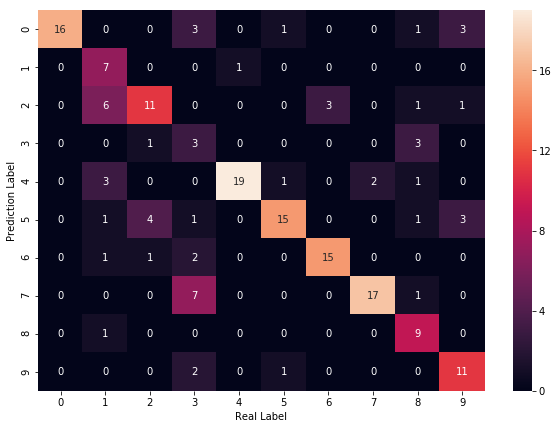

In [21]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [22]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5] real:5
#1 min_error:1 index:[2] real:2
#2 min_error:3 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:2 index:[1] real:1
#5 min_error:1 index:[7] real:7
#6 min_error:1 index:[6] real:6
#7 min_error:1 index:[7] real:3
#8 min_error:1 index:[2] real:2
#9 min_error:1 index:[1] real:1
#10 min_error:2 index:[7] real:7
#11 min_error:3 index:[0 2 4 5] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:2 index:[3] real:3
#14 min_error:2 index:[1] real:1
#15 min_error:1 index:[5] real:3
#16 min_error:2 index:[9] real:9
#17 min_error:2 index:[1] real:1
#18 min_error:2 index:[7] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:3 index:[8] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:3 index:[2 3 5 7] real:3
#23 min_error:2 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:1 index:[0] real:0
#26 min_error:2 index:[5] real:5
#27 min_error:2 index:[3] real:3
#28 min_error:1 index:[6] real:6
#29 min_error:3 index:[6 9] real:9
#30 mi

In [24]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7111935683364254
Avg Base Learner:0.8235003092145948


In [30]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.13333333333333333
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.2611111111111111
Accuracy on training set: 0.4722222222222222
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.5
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.65
Accuracy on training set: 0.7


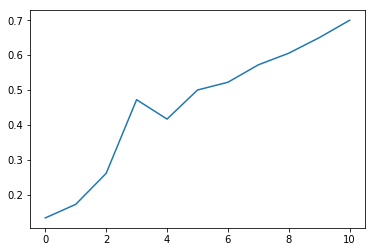

In [32]:
plt.plot(range(11),list_acc)
plt.show()

In [33]:
list_acc

[0.13333333333333333,
 0.17222222222222222,
 0.2611111111111111,
 0.4722222222222222,
 0.4166666666666667,
 0.5,
 0.5222222222222223,
 0.5722222222222222,
 0.6055555555555555,
 0.65,
 0.7]